In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.metrics import f1_score, roc_auc_score, mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVR
%matplotlib inline

## Пункт 4

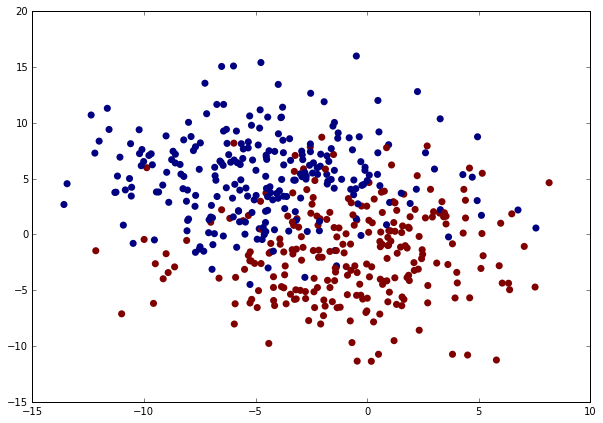

In [3]:
X, y = make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=4)

plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, linewidths=0, s=50)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1234)

In [5]:
def draw_graphics(models, X, Y, figsize=(15, 7), num_col=1, support_size=300, point_size=10, margin=False):
    for i_model, model in enumerate(models):
        if i_model % num_col == 0:
            plt.figure(figsize=figsize)
        plt.subplot(1, num_col, i_model % num_col + 1)
            
        C = model.get_params()['C']
        
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                        s=np.abs(model._dual_coef_) * support_size, facecolors='none', zorder=10)
        plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, s=point_size, cmap=plt.cm.Set2)
            
        for number, support_vector in enumerate(model.support_vectors_):
            coef = model._dual_coef_[0, number]
            plt.text(support_vector[0] + 0.01, support_vector[1] + 0.01,
                     '{:.2}'.format(coef), fontsize=12,
                     bbox=dict(facecolor='r' if np.abs(coef) == C else 'w', alpha=0.6))
            
        plt.axis('tight')
        x_min = X[:, 0].min() - 0.1
        x_max = X[:, 0].max() + 0.1
        y_min = X[:, 1].min() - 0.1
        y_max = X[:, 1].max() + 0.1

        XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
        Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        if margin:
            plt.pcolormesh(XX, YY, Z, cmap=plt.cm.RdBu)
        else:
            plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Set2)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())
        plt.title('$C$ = {}, kernel = {}'.format(C, model.get_params()['kernel']))
        
        if (i_model + 1) % num_col == 0:
            plt.show()
    
    if (i_model + 1) % num_col != 0:
            plt.show()

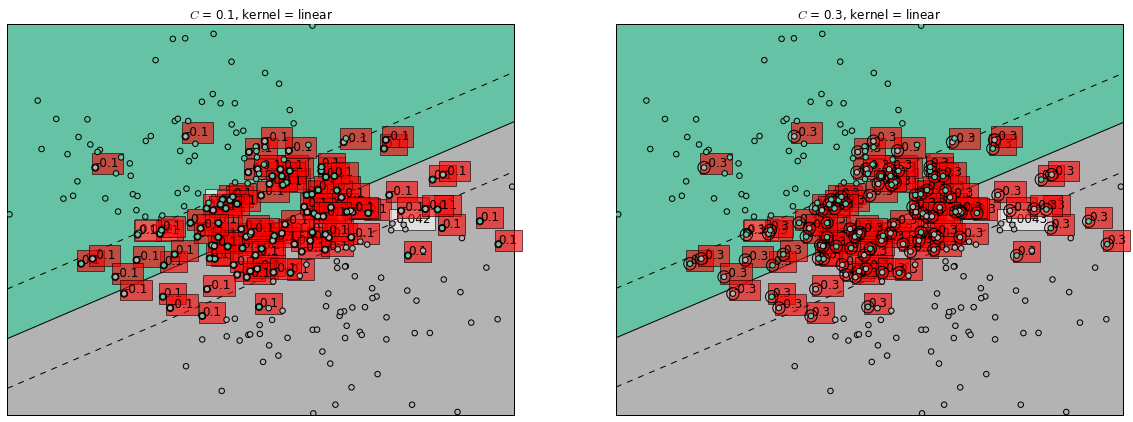

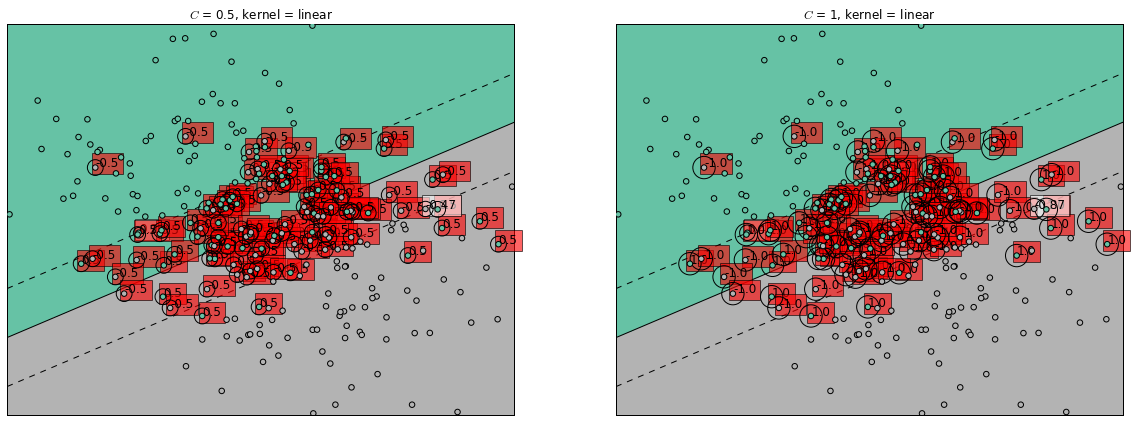

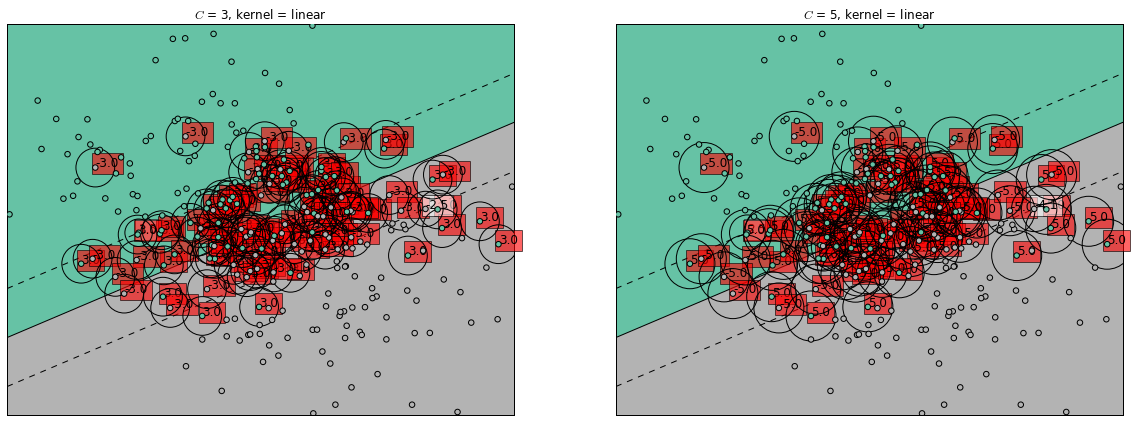

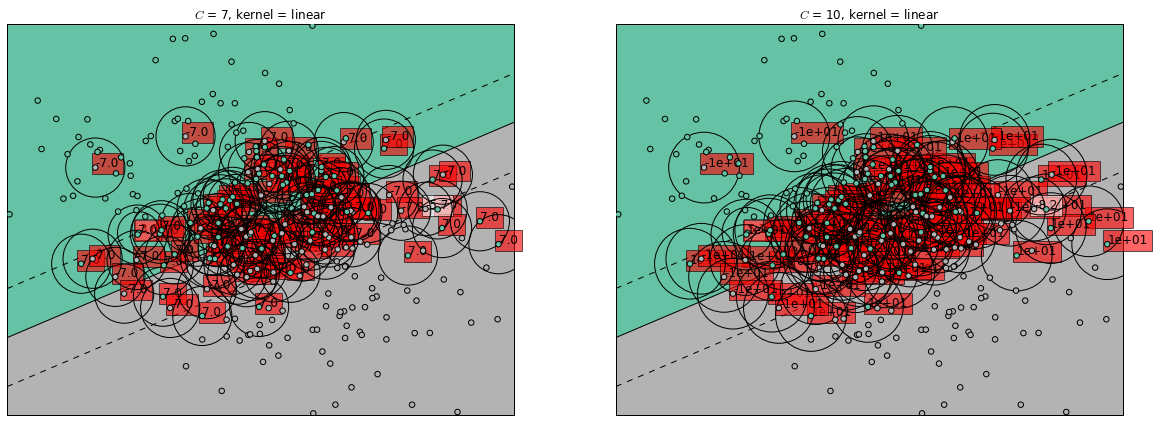

In [68]:
draw_graphics([SVC(kernel='linear', C=C).fit(X_train, y_train) for C in [0.1, 0.3, 0.5, 1, 3, 5, 7, 10]], 
              X_train, y_train, num_col=2, figsize=(20, 7), support_size=500, point_size=30)

In [69]:
f1_scores = []
roc_auc_scores = []
for C in [0.1, 0.3, 0.5, 1, 3, 5, 7, 10]:
    clf = SVC(kernel='linear', C=C, probability=True)
    clf.fit(X_train, y_train)
    
    f1_scores.append(f1_score(y_test, clf.predict(X_test)))
    roc_auc_scores.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
    
    

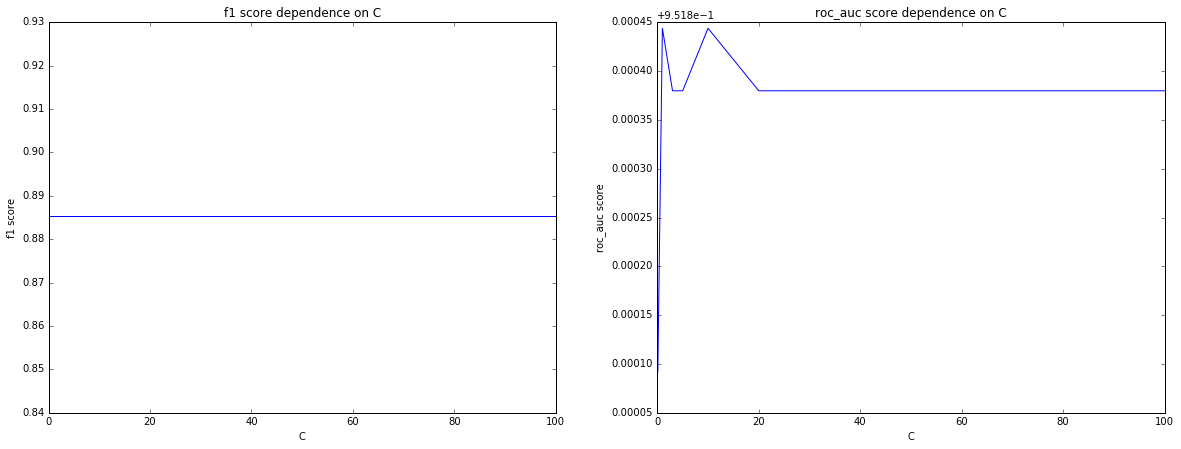

In [71]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
plt.plot([0.1, 1, 3, 5, 10, 20, 50, 100], f1_scores)
plt.title("f1 score dependence on C")
plt.xlabel("C")
plt.ylabel("f1 score")

plt.subplot(1, 2, 2)
plt.plot([0.1, 1, 3, 5, 10, 20, 50, 100], roc_auc_scores)
plt.title("roc_auc score dependence on C")
plt.xlabel("C")
plt.ylabel("roc_auc score")

plt.show()

## Пункт 7

SVR использует EPS-insensitive функцию потерь

In [36]:
def svr_loss_function(y_pred, y_test, eps):
    error = 0
    for i in range(len(y_test)):
        error += max(0, abs(y_test[i] - y_pred[i]) - eps)
    return float(error)/len(y_test)

In [61]:
mse_errors = []
svr_loss_errors = []
for C in [0.1, 0.3, 0.5, 1, 3, 5, 7, 10]:
    mse_errors_C = []
    svr_loss_errors_C = []
    for eps in [0.001, 0.005, 0.01, 0.02, 0.25, 0.5, 0.7, 1]:
        clf = SVR(C=C, epsilon=eps)
        clf.fit(X_train, y_train)
        
        mse_errors_C.append(mean_squared_error(clf.predict(X_test), y_test))
        svr_loss_errors_C.append(svr_loss_function(clf.predict(X_test), y_test, eps))
        
    mse_errors.append(mse_errors_C)
    svr_loss_errors.append(svr_loss_errors_C)

In [62]:
pd.DataFrame.from_records(mse_errors)

,0,1,2,3,4,5,6,7
0,0.116473,0.116436,0.116482,0.116401,0.138626,0.25,0.25,0.25
1,0.105906,0.105855,0.105803,0.105853,0.132782,0.25,0.25,0.25
2,0.107297,0.107139,0.106940,0.107321,0.134127,0.25,0.25,0.25
3,0.112849,0.113015,0.113405,0.113951,0.138359,0.25,0.25,0.25
4,0.137135,0.137166,0.138209,0.139615,0.159301,0.25,0.25,0.25
5,0.149577,0.149967,0.150986,0.153618,0.176004,0.25,0.25,0.25
6,0.160829,0.160903,0.161203,0.162812,0.186121,0.25,0.25,0.25
7,0.180406,0.180090,0.180735,0.183763,0.201659,0.25,0.25,0.25


In [63]:
pd.DataFrame.from_records(svr_loss_errors)

,0,1,2,3,4,5,6,7
0,0.253193,0.249689,0.245980,0.238351,0.100208,0,0,0
1,0.188719,0.186172,0.183421,0.178506,0.089772,0,0,0
2,0.180313,0.178372,0.176138,0.173123,0.092262,0,0,0
3,0.187124,0.184950,0.183744,0.179597,0.101086,0,0,0
4,0.219865,0.216529,0.214205,0.210990,0.123085,0,0,0
5,0.240110,0.237083,0.234323,0.231654,0.134008,0,0,0
6,0.253283,0.249758,0.246333,0.241871,0.141043,0,0,0
7,0.268679,0.265108,0.261885,0.258476,0.152415,0,0,0


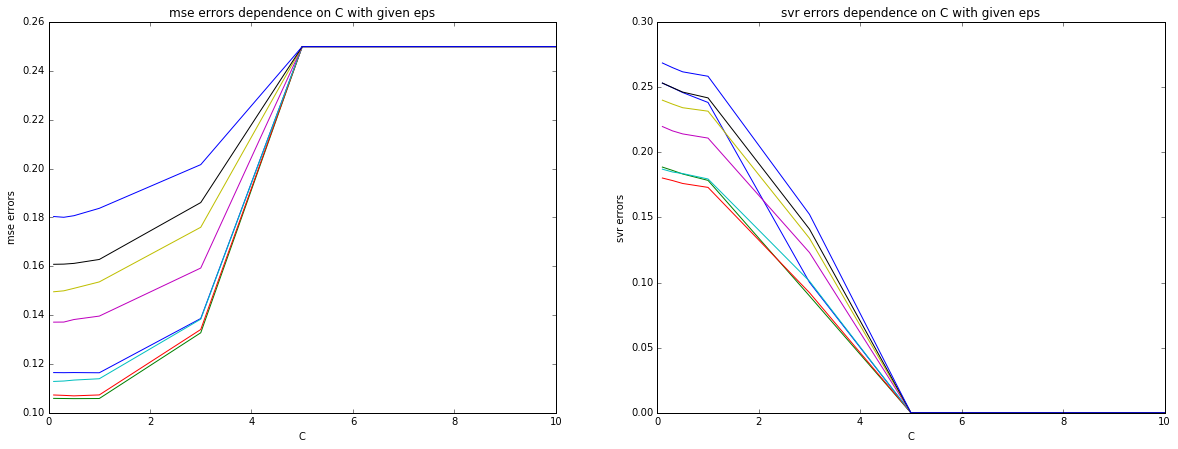

In [66]:
C = [0.1, 0.3, 0.5, 1, 3, 5, 7, 10]
eps = [0.001, 0.005, 0.01, 0.02, 0.25, 0.5, 0.7, 1]

plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
for i in range(len(eps)):
    plt.plot(C, mse_errors[i], label="eps=%s" % eps[i])
plt.title("mse errors dependence on C with given eps")
plt.xlabel("C")
plt.ylabel("mse errors")

plt.subplot(1, 2, 2)
for i in range(len(eps)):
    plt.plot(C, svr_loss_errors[i], label="eps=%s" % eps[i])
plt.title("svr errors dependence on C with given eps")
plt.xlabel("C")
plt.ylabel("svr errors")

plt.show()

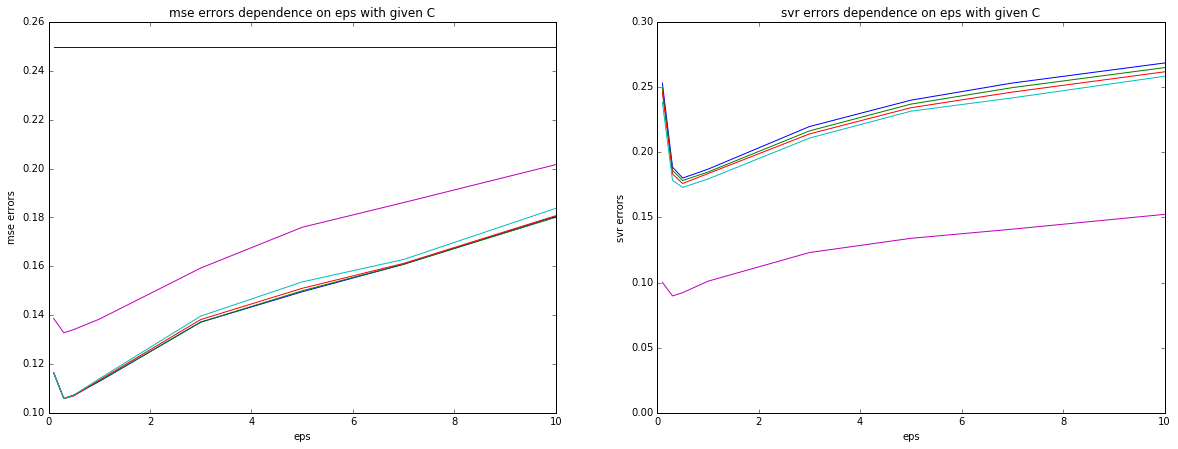

In [67]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
for i in range(len(eps)):
    plt.plot(C, [mse_errors[j][i] for j in range(8)], label="eps=%s" % eps[i])
plt.title("mse errors dependence on eps with given C")
plt.xlabel("eps")
plt.ylabel("mse errors")

plt.subplot(1, 2, 2)
for i in range(len(eps)):
    plt.plot(C, [svr_loss_errors[j][i] for j in range(8)], label="eps=%s" % eps[i])
plt.title("svr errors dependence on eps with given C")
plt.xlabel("eps")
plt.ylabel("svr errors")

plt.show()

Из матриц ошибок видно, что при больших C (>=3) значения mse и ошибки SVR обе большие. Значит, оптимальное С должно быть небольшим. eps тоже должен быть небольшим, при больших eps ошибки функции потерь SVR и mse для этого алгоритма не показательны. по матрицам ошибок и графикам непонятно, какие точно значения eps и C оптимальны, это зависит во многом от того, какую из функций потерь хочется минимизировать.